---
title: "Exploration over parameters in the ABM model"
author: "Hector Castillo"
format: pdf
toc: true
number-sections: false
jupyter: python3
bibliography: references.bib
---

In [1]:
#| echo: false
import experiment2stats

## Executions 

The ABM has been explored over four parameters: $\beta$, *g*, *k* and *w*. Also the $\eta$ has been considered to obtain results for a monopolistic market ($\eta>0.25$) and perfect competition ($\eta \approx 0$).
The parameters appear in the ABM as:

- *k* is the capital intensity
- *w* is the real wage, <span style="background:#FFFF00">the markdown interest rate ?????????????</span>
- *g* is the bankruptcy cost
- $\beta$ is the skewness
- $\eta$ is the inverse of the elasticity of demand ($1/\varepsilon$)

For each combination of those parameters, the model has been run 10 times using a Montecarlo method. So a total of 3250 executions of the model have been done:

In [2]:
parameters_not_eta = {
   'beta': [0.02, 0.03, 0.04, 0.05],
   'g': [1.0, 1.1, 1.2],
   'k': [1.0, 1.1, 1.2],
   'w': [0.5, 0.6, 0.7]
}
eta = {
   'eta': [0.0001, 0.1, 0.3]
}

Many of those executions are not representative of a realistic system with crisis, as the example in @fig-not-real-market. So the first purge done was those models in which the Spearman's rank correlation coefficient was higher than 0.99, discarding a total of 2047:

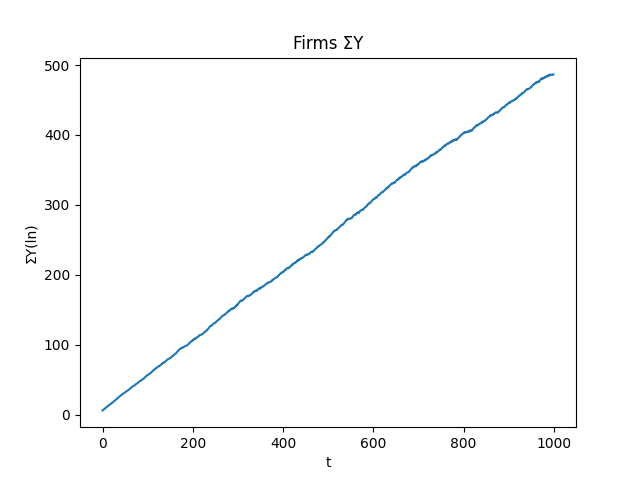

In [3]:
#| label: fig-not-real-market
#| fig-cap: "The Spearkman's rank correlation of this GDP over time is 0.9999"
#| echo: false
from IPython.display import Image
Image("experiment2/bad/beta002g10k10w05eta00_4_firms_y.png")

Also even if the Spearman's rank correlation is below the limit of 0.99, some of the executions show an evolution of ups and downs in GDP only at the last third of the ticks (t>666), as in @fig-regular-market. We classify them also as useless models, and we discard them also (192 in total) , so with this new discarded items, we have only 1001 executions of models. 


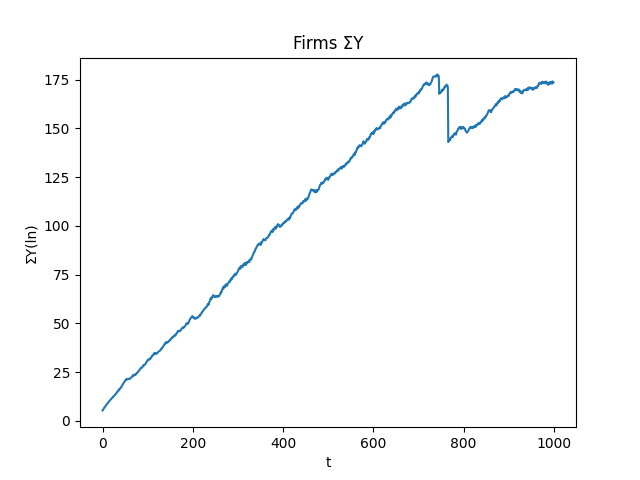

In [4]:
#| label: fig-regular-market
#| fig-cap: "The Spearkman's rank correlation of this GDP over time is 0.9617757977757978, but 0.9998987703872105 considering only t=[0..666]."
#| echo: false
from IPython.display import Image
Image("experiment2/regular/beta002g10k11w06eta03_4_firms_y.png")

With all these, we should also consider what to do with those models where a majority of executions are not valid. That is, when the capacity of the selected combination of parameters to success is unlikely, as it happens with the GDP of model with parameters $\beta=0.02$, $g=1.0$, $k=1.1$ $w=0.6$ and $\eta=0.3$. The GDP of nine of them has no up and downs, as shown in @fig-beta002g10k11w06eta03_bad, and the only one we can consider correct, @fig-beta002g10k11w06eta03_good, can be discarded? We though so. 
The decumulative distribution function (DDF) with this parametrized models is shown in @fig-ddf. The data considers the values of the ten executions of the Montecarlo simulation, the nine with no ups and downs and also the only one successful. More of these could be understood reading @article1, but in this case we tend to discard completely the combination of parameters because of DDF and data indicates that market is not realistic.

In [5]:
#| label: fig-beta002g10k11w06eta03_bad
#| fig-cap: "GDP of the executions of beta=0.02, g=1.0, k=1.1 w=0.6 and eta=0.3"
#| echo: false
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
model_to_plot = "beta002g10k11w06eta03_"
fig, ((ax1, ax2, ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True) 
ax1.imshow( mpimg.imread( 'experiment2\\regular\\'+ model_to_plot +'4_firms_y.png') )
ax1.axis('off')
ax2.imshow( mpimg.imread( 'experiment2\\regular\\'+ model_to_plot +'5_firms_y.png') )
ax2.axis('off')
ax3.imshow( mpimg.imread( 'experiment2\\bad\\'+ model_to_plot +'1_firms_y.png') )
ax3.axis('off')
ax4.imshow( mpimg.imread( 'experiment2\\bad\\'+ model_to_plot +'2_firms_y.png') )
ax4.axis('off')
ax5.imshow( mpimg.imread( 'experiment2\\bad\\'+ model_to_plot +'3_firms_y.png') )
ax5.axis('off')
ax6.imshow( mpimg.imread( 'experiment2\\bad\\'+ model_to_plot +'6_firms_y.png') )
ax6.axis('off')
ax7.imshow( mpimg.imread( 'experiment2\\bad\\'+ model_to_plot +'7_firms_y.png') )
ax7.axis('off')
ax8.imshow( mpimg.imread( 'experiment2\\bad\\'+ model_to_plot +'8_firms_y.png') )
ax8.axis('off')
ax9.imshow( mpimg.imread( 'experiment2\\bad\\'+ model_to_plot +'9_firms_y.png') )
ax9.axis('off')
plt.show()


<Figure size 1650x1050 with 9 Axes>

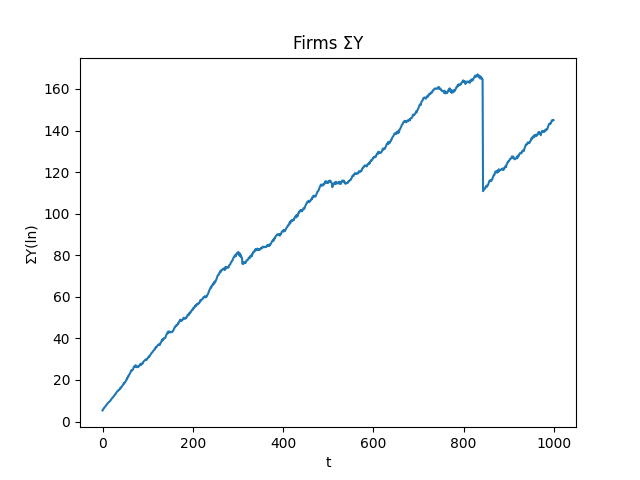

In [6]:
#| label: fig-beta002g10k11w06eta03_good
#| fig-cap: "The Spearkman's rank correlation of this GDP over time is 0.9617757977757978, but 0.9998987703872105 considering only t=[0..666]."
#| echo: false
from IPython.display import Image
Image("experiment2/good/beta002g10k11w06eta03_0_firms_y.png")



In [7]:
#| label: fig-ddf
#| fig-cap: "DDF of a model very unlikely to success (left) and the good expected form of a model with better performance (right)"
#| echo: false
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharex=True, sharey=True) 
ax1.imshow( mpimg.imread( "experiment2/beta002g10k11w06eta03_ddf.png") )
ax1.axis('off')
ax2.imshow( mpimg.imread( "experiment2/beta002g11k10w06eta00_ddf.png"))
ax2.axis('off')
plt.show()


<Figure size 1650x1050 with 2 Axes>

## GDP in valid models

If we now pay attention to the parameters that have more executions with a reasonable number of ups and downs (green) in @fig-valid_models the conclusion is that:

- *k* = 1.1
- *w* = 0.7
- *g* is the bankruptcy cost, not really relevant
- \beta not really relevant
- \eta is the inverse of the elasticity of demand (1/&epsilon;)


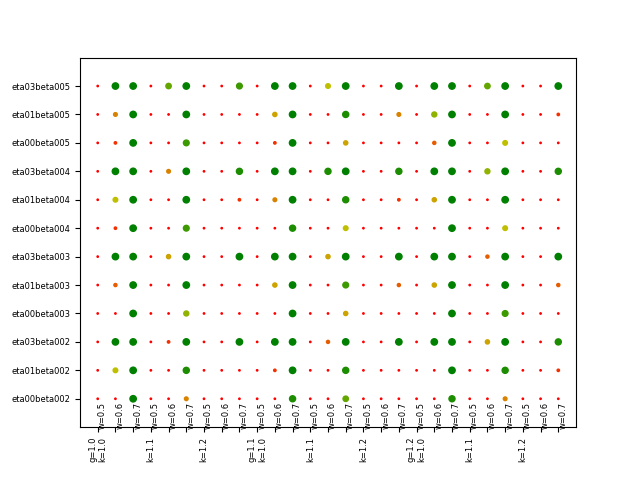

In [8]:
#| label: fig-valid_models
#| fig-cap: "Greener colors are for combinations with more executions considerated correct"
#| echo: false
from IPython.display import Image
Image("experiment2/plot_valid_models.png")

Let's analyze the GDP: considering the same colors we have seen in @fig-valid_models we can depict the combinations of parameters with better success, but using the size of the balloon for bad debt size for the bank sector (logarithm) and Z-position for average GDP of firms (also logarithm). These results could be found in @fig-3d. To explain it:
- Bigger average GDP is obtained with models with poor behaviour, but at cost of a bigger amount of bank bad debt.
- Few main GDP is representative of the models we identified as good, but also with less bank risk.

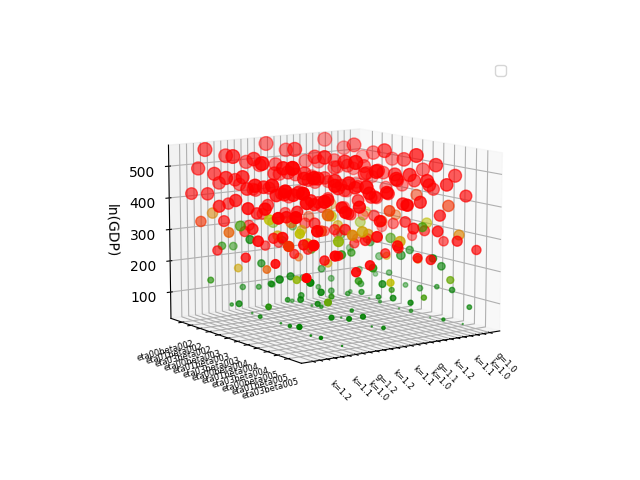

In [9]:
#| label: fig-3d
#| fig-cap: "Using the same colors as before, size of point is related with bad debt, and axis Z represents the logarithm of GDP"
#| echo: false
from IPython.display import Image
Image("experiment2/plot_3d.png")